In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [159]:
df = pd.read_csv('train.csv')

In [160]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [161]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Description Of DataSet

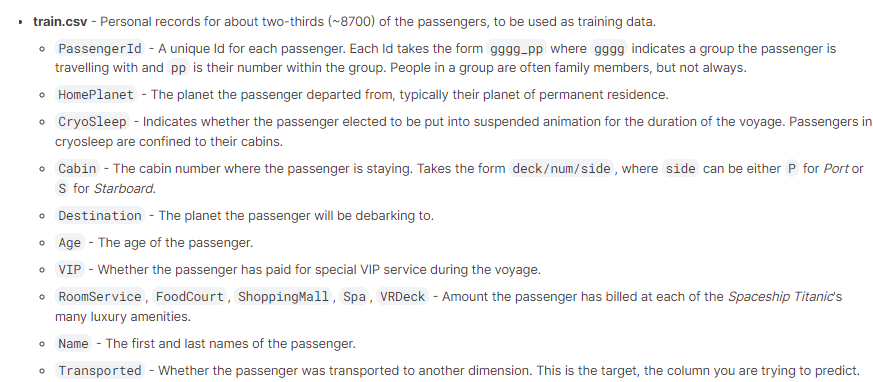

## Data Cleaning process

-> Show Categorical Features And Numerical Features.

-> Check Missing Values

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Check Categorical And Numerical Variables

In [163]:
print("-> Categorical Variables \n")
Categorical_var = df.select_dtypes(include=['object']).columns
for cl in Categorical_var:
    print(cl)

-> Categorical Variables 

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [164]:
print("-> Numerical Variables \n")
Numerical_var = df.select_dtypes(exclude=['object']).columns
for cl in Numerical_var:
    print(cl)

-> Numerical Variables 

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [165]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Handling Mission Values

In [166]:
#Check For Missiong Value

for col in df.columns:
    print(col,df[col].isna().sum())

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [167]:
#Here The Percentage Of Mission Values In Given Data

for col in df.columns:
    print(col,"-",(df[col].isna().sum()/len(df))*100,"%")

PassengerId - 0.0 %
HomePlanet - 2.312205222592891 %
CryoSleep - 2.4962613597147127 %
Cabin - 2.289198205452663 %
Destination - 2.093638559760727 %
Age - 2.0591280340503855 %
VIP - 2.3352122397331185 %
RoomService - 2.082135051190613 %
FoodCourt - 2.105142068330841 %
ShoppingMall - 2.392729782583688 %
Spa - 2.105142068330841 %
VRDeck - 2.1626596111814105 %
Name - 2.300701714022777 %
Transported - 0.0 %


In [168]:
for cat_col in Categorical_var:
    if cat_col != "Name":
        df[cat_col].fillna(df[cat_col].mode()[0],inplace = True)

In [169]:
#Here Show Cleaned Categorical data

for cat_col in Categorical_var:
    print(cat_col,df[cat_col].isna().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [170]:
for Num_col in Numerical_var:
    df[Num_col].fillna(df[Num_col].mean(),inplace = True)

In [171]:
#Here Show Cleaned Numerical data
for Num_col in Numerical_var:
    print(Num_col,df[Num_col].isna().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


In [172]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

## Data Analysis Phase


In [173]:
# Data Exploration 

df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [174]:
df.describe(include='O')

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


# Plotting Categorical Variables

In [175]:
df.drop(["Name"],axis=1,inplace = True)

In [176]:
Categorical_col = df.select_dtypes(include=['O']).columns

In [177]:
Categorical_col

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

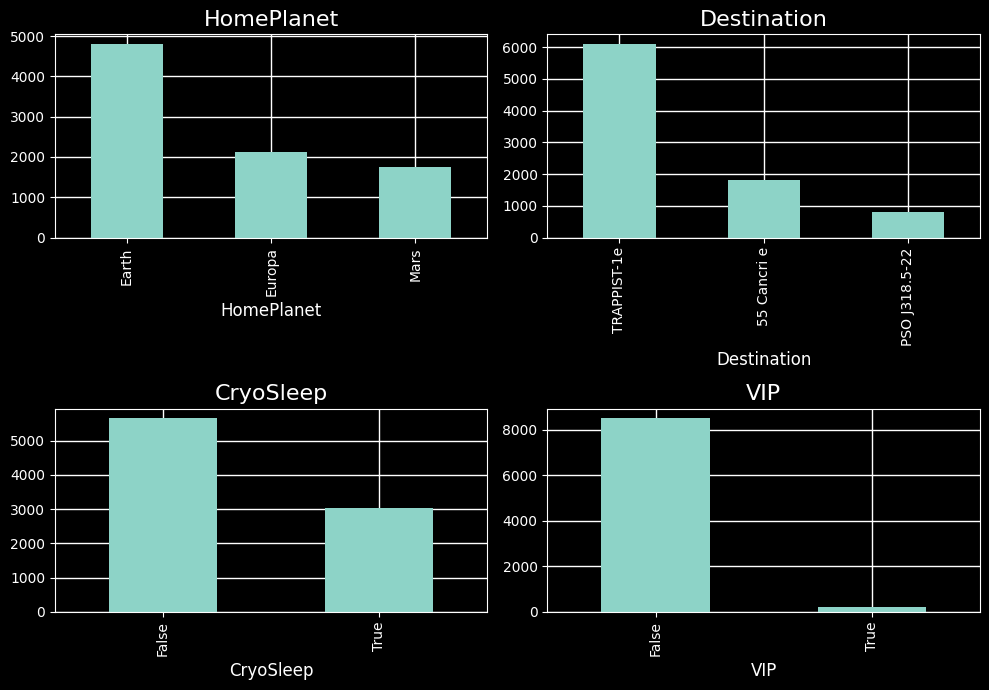

In [178]:
plt.figure(figsize=[10,7])
plt.subplot(2,2,1)
df["HomePlanet"].value_counts().plot(kind = 'bar',title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind = 'bar',title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind = 'bar',title = 'CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind = 'bar',title = 'VIP')
plt.tight_layout()
plt.style.use("dark_background")

Here Is The Plot Of Categorical Variables 

HomePlanet :-> The Large Number Of passangers are on Earth

VIP :-> Few Number of passangers are choose VIP Services 

In [179]:
# building the deck and port features from the 'cabin' column

df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df["Deck"] = df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [180]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)

In [181]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


## Encoding Categorical Data Into Numerical Data

In [182]:
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

In [183]:
unique_vip = df["VIP"].unique()
df["VIP"] = df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [184]:
unique_cryosleep = df["CryoSleep"].unique()
df["CryoSleep"] = df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)

In [185]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [186]:
df.drop(labels="PassengerId",axis = 1,inplace=True)

## Final Cleaned Data Set Which Is Ready For Modeling

In [187]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


## Train Our Machine Learning Model

In [188]:
# Here We Divided Our Dataset Into Dependent and Independent Function

X = df.drop("Transported", axis=1)
y = df["Transported"]

In [189]:
# We Further Divide Our Data Into Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train Our Model Using Logistic Regression


In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
LG = LogisticRegression()

In [192]:
LG.fit(X_train,y_train)

LogisticRegression()

In [193]:
y_pred = LG.predict(X_test)

## Let's Check Performance Metrics

-> Using Confusion Matrics 

In [194]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100,"%")
print(classification_report(y_pred,y_test))

[[1009  233]
 [ 415 1212]]
77.41373300801672 %
              precision    recall  f1-score   support

       False       0.71      0.81      0.76      1242
        True       0.84      0.74      0.79      1627

    accuracy                           0.77      2869
   macro avg       0.77      0.78      0.77      2869
weighted avg       0.78      0.77      0.78      2869



## Perform Hyperparameter Tuning

In [195]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [196]:
parameters = {'penalty': ('l1', 'l2', 'elasticnet', None),'C' : [1,4,5,12,20,35]}

In [197]:
GS = GridSearchCV(LG,param_grid=parameters)

In [198]:
GS.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 4, 5, 12, 20, 35],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [153]:
GS.best_params_

{'C': 5, 'penalty': 'l2'}

In [199]:
LG = LogisticRegression(C= 5, penalty= 'l2')

In [200]:
LG.fit(X_train,y_train)

LogisticRegression(C=5)

In [201]:
y_pred = LG.predict(X_test)

In [202]:
y_pred

array([False,  True,  True, ..., False, False,  True])

In [203]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100,"%")
print(classification_report(y_pred,y_test))

[[1016  238]
 [ 408 1207]]
77.48344370860927 %
              precision    recall  f1-score   support

       False       0.71      0.81      0.76      1254
        True       0.84      0.75      0.79      1615

    accuracy                           0.77      2869
   macro avg       0.77      0.78      0.77      2869
weighted avg       0.78      0.77      0.78      2869



## Train Our Model Using Decision Tree


In [235]:
from sklearn import tree

In [236]:
DT = tree.DecisionTreeClassifier()

In [237]:
parameters = {'criterion':('gini', 'entropy', 'log_loss'),'splitter':('best','random'),'min_samples_split':[1,2,3,4]}

In [238]:
GS = GridSearchCV(DT,param_grid=parameters)

In [239]:
GS.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'min_samples_split': [1, 2, 3, 4],
                         'splitter': ('best', 'random')})

In [240]:
GS.best_params_

{'criterion': 'log_loss', 'min_samples_split': 4, 'splitter': 'best'}

In [242]:
DT = tree.DecisionTreeClassifier(criterion='log_loss',min_samples_split= 4,splitter='best')

In [243]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', min_samples_split=4)

In [244]:
y_pred = DT.predict(X_test)

In [ ]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100,"%")
print(classification_report(y_pred,y_test))